# Synchronous Federated Learning

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from utils import Kernel

from dataset.dodd import load_dodd

from onlineKernels.klmsRFF import *
from onlineKernels.knlmsRFF import *
from onlineKernels.krlsRFF import *

from syncFL import fl_sync
from asyncFL import fl_async
from cent_learn import cent_learn
# Multiprocessing
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  8


100%|███████████████████████████████████████████| 10/10 [00:08<00:00,  1.16it/s]


Text(0.5, 0, 'iteration')

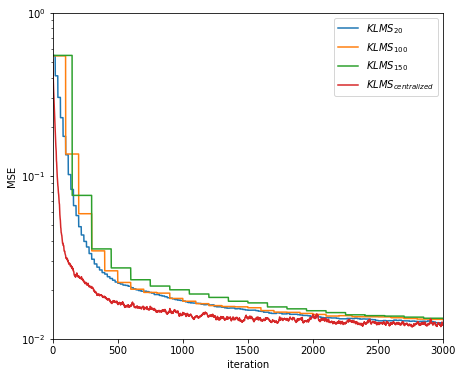

In [2]:
# Federated learning: Synchronous updating rule
plt.figure(figsize=(7, 6))

kernel = Kernel(3.73)
num_data = 3000
step_size = 0.8
reg_coeff = 1e-6

K = 10 # K edge clients
c =  np.ones(K).reshape(K,1)/K # edge weighting
D = 100 # Dictionary size
L = [20, 100, 150]
iteration = 10000
num_experiments = 10

step_size = 0.8
KLMS_RFF = klms_rff(step_size,D)
KLMS_RFF_cent = klms_rff(0.3,D)
for l in L:
    amse = np.zeros(iteration)
    amse_cent = np.zeros(iteration)
    for epoch in tqdm(range(num_experiments)):

        # Process data and kernel
        u,d,d_true = load_dodd(num_data)
        sigma = 1/np.sqrt(2*kernel.sigma)
        W = (1/sigma) * np.random.normal(size=(2,D))
        b = np.random.uniform(0,2*np.pi,(D,1))
        h = np.sqrt(2/D) * np.cos(W.T @ u.T + b)

        FLsync = fl_sync(K,h,l)
        
        # Federated learning
        mse_cent = cent_learn(iteration,K,KLMS_RFF_cent,h,u,d)
        amse_cent += mse_cent/num_experiments
        mse = FLsync.train(iteration,KLMS_RFF,u,d)
        amse += mse/num_experiments

    plt.semilogy(range(len(amse)),amse,label="$KLMS_{" + str(l)+"}$")
plt.semilogy(range(len(amse_cent)),amse_cent,label="$KLMS_{centralized}$")
plt.legend()
plt.ylim([1e-2,1e0])
plt.xlim([0,3000])
plt.ylabel("MSE")
plt.xlabel("iteration")

In [ ]:
# Federated learning: Synchronous updating rule
plt.figure(figsize=(7, 6))

kernel = Kernel(3.73)
num_data = 3000
step_size = 0.8
reg_coeff = 1e-6

K = 10 # K edge clients
c =  np.ones(K).reshape(K,1)/K # edge weighting
D = 100 # Dictionary size
L = [20, 100, 150]
iteration = 10000
num_experiments = 10

step_size = 0.8
KNLMS_RFF = knlms_rff(step_size,reg_coeff,D)
for l in L:
    amse = np.zeros(iteration)
    amse_cent = np.zeros(iteration)
    for epoch in tqdm(range(num_experiments)):

        # Process data and kernel
        u,d,d_true = load_dodd(num_data)
        sigma = 1/np.sqrt(2*kernel.sigma)
        W = (1/sigma) * np.random.normal(size=(2,D))
        b = np.random.uniform(0,2*np.pi,(D,1))
        h = np.sqrt(2/D) * np.cos(W.T @ u.T + b)

        FLsync = fl_sync(K,h,l)
        
        # Federated learning
        mse_cent = cent_learn(iteration,K,KLMS_RFF_cent,h,u,d)
        amse_cent += mse_cent/num_experiments
        mse = FLsync.train(iteration,KLMS_RFF,u,d)
        amse += mse/num_experiments

    plt.semilogy(range(len(amse)),amse,label="$KLMS_{" + str(l)+"}$")
plt.semilogy(range(len(amse_cent)),amse_cent,label="$KLMS_{centralized}$")
plt.legend()
plt.ylim([1e-2,1e0])
plt.xlim([0,3000])
plt.ylabel("MSE")
plt.xlabel("iteration")

In [ ]:
# Federated learning: Synchronous updating rule
plt.figure(figsize=(7, 6))

kernel = Kernel(3.73)
num_data = 3000
step_size = 0.8
reg_coeff = 1e-6

K = 10 # K edge clients
c =  np.ones(K).reshape(K,1)/K # edge weighting
D = 100 # Dictionary size
L = [20, 100, 150]
iteration = 10000
num_experiments = 10

step_size = 0.8
KLMS_RFF = klms_rff(step_size,D)
KLMS_RFF_cent = klms_rff(0.3,D)
for l in L:
    amse = np.zeros(iteration)
    amse_cent = np.zeros(iteration)
    for epoch in tqdm(range(num_experiments)):

        # Process data and kernel
        u,d,d_true = load_dodd(num_data)
        sigma = 1/np.sqrt(2*kernel.sigma)
        W = (1/sigma) * np.random.normal(size=(2,D))
        b = np.random.uniform(0,2*np.pi,(D,1))
        h = np.sqrt(2/D) * np.cos(W.T @ u.T + b)

        FLsync = fl_sync(K,h,l)
        
        # Federated learning
        mse_cent = cent_learn(iteration,K,KLMS_RFF_cent,h,u,d)
        amse_cent += mse_cent/num_experiments
        mse = FLsync.train(iteration,KLMS_RFF,u,d)
        amse += mse/num_experiments

    plt.semilogy(range(len(amse)),amse,label="$KLMS_{" + str(l)+"}$")
plt.semilogy(range(len(amse_cent)),amse_cent,label="$KLMS_{centralized}$")
plt.legend()
plt.ylim([1e-2,1e0])
plt.xlim([0,3000])
plt.ylabel("MSE")
plt.xlabel("iteration")

100%|███████████████████████████████| 10/10 [00:07<00:00,  1.41it/s]


(0.0, 5000.0)

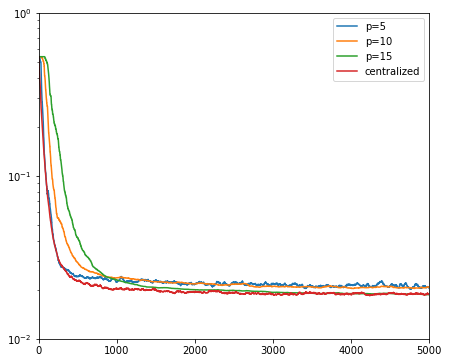

In [4]:
# Federated learning: Asynchronous updating rule
plt.figure(figsize=(7, 6))

K = 10 # K edge clients
c =  np.ones(K).reshape(K,1)/K # edge weighting
D = 100 # Dictionary size
P = [5,10,15]
iteration = 10000
num_experiments = 10

step_size = 0.6
KLMS_RFF = klms_rff(step_size,D)
KLMS_RFF_cent = klms_rff(0.1,D)
KNLMS_RFF = knlms_rff(step_size,reg_coeff,D)
KRLS_RFF = krls_rff(D)
for p in P:
    amse = np.zeros(iteration)
    amse_cent = np.zeros(iteration)
    for epoch in tqdm(range(num_experiments)):

        # Process data and kernel
        u,d,_ = load_dodd(num_data)
        sigma = 1/np.sqrt(2*kernel.sigma)
        W = (1/sigma) * np.random.normal(size=(2,D))
        b = np.random.uniform(0,np.pi,(D,1))
        h = np.sqrt(2/D) * np.cos(W.T @ u.T + b)
        
        FLasync = fl_async(K,h,p)
        
        mse_cent = cent_learn(iteration,K,KLMS_RFF_cent,h,u,d)
        amse_cent += mse_cent/num_experiments
        mse = FLasync.train(iteration,KLMS_RFF,u,d)
        amse += mse/num_experiments

    plt.semilogy(range(len(amse)),amse,label="p=" + str(p))
plt.semilogy(range(len(amse_cent)),amse_cent,label="centralized")
plt.legend()
plt.ylim([1e-2,1e0])
plt.xlim([0,3000])
plt.ylabel("MSE")
plt.xlabel("iteration")

100%|███████████████████████████████████████████| 15/15 [01:04<00:00,  4.28s/it]


(0.0, 3000.0)

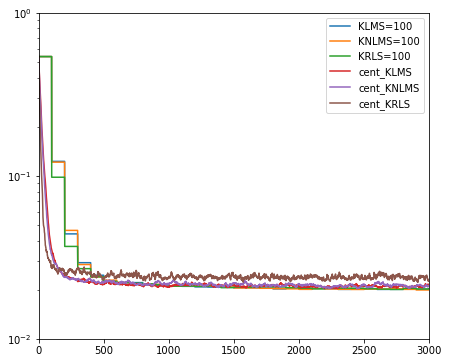

In [39]:
# Parameters
num_data = 3000
kernel = Kernel(3.73)

step_size = 0.8
reg_coeff = 1e-6
threshold = 0.05
# Synchronous Federated learning using different kernels
plt.figure(figsize=(7, 6))

K = 10 # K edge clients
c =  np.ones(K).reshape(K,1)/K # edge weighting
D = 100 # Dictionary size
L = [100]
iteration = 10000
num_experiments = 10

KLMS_RFF = klms_rff(step_size,D)
KNLMS_RFF = knlms_rff(step_size,reg_coeff,D)
KRLS_RFF = krls_rff(D,beta=0.01,l=1.0)
KLMS_RFF_cent = klms_rff(0.1,D)
KNLMS_RFF_cent = knlms_rff(0.1,1e-8,D)
KRLS_RFF_cent = krls_rff(D,beta=4,l=1.0)
for l in L:
    amse_KLMS = np.zeros(iteration)
    amse_KNLMS = np.zeros(iteration)  
    amse_KRLS = np.zeros(iteration)  
    amse_KLMS_cent = np.zeros(iteration)
    amse_KNLMS_cent = np.zeros(iteration)  
    amse_KRLS_cent = np.zeros(iteration)    

    for epoch in tqdm(range(num_experiments)):

        # Process data and kernel
        u,d,d_true = load_dodd(num_data)
        sigma = 1/np.sqrt(2*kernel.sigma)
        W = (1/sigma) * np.random.normal(size=(2,D))
        b = np.random.uniform(0,2*np.pi,(D,1))
        h = np.sqrt(2/D) * np.cos(W.T @ u.T + b)

        FLsync = fl_sync(K,h,l)
        
        mse_KLMS_cent = cent_learn(iteration,K,KLMS_RFF_cent,h,u,d)
        amse_KLMS_cent += mse_KLMS_cent/num_experiments
        mse_KNLMS_cent = cent_learn(iteration,K,KNLMS_RFF_cent,h,u,d)
        amse_KNLMS_cent += mse_KNLMS_cent/num_experiments
        mse_KRLS_cent = cent_learn(iteration,K,KRLS_RFF_cent,h,u,d)
        amse_KRLS_cent += mse_KRLS_cent/num_experiments
        
        mse_KLMS = FLsync.train(iteration,KLMS_RFF,u,d)
        amse_KLMS += mse_KLMS/num_experiments
        mse_KNLMS = FLsync.train(iteration,KNLMS_RFF,u,d)
        amse_KNLMS += mse_KNLMS/num_experiments
        mse_KRLS = FLsync.train(iteration,KRLS_RFF,u,d)
        amse_KRLS += mse_KRLS/num_experiments  
        
plt.semilogy(range(len(amse_KLMS)),amse_KLMS,label="$KLMS_{" + str(l)+"}$")
plt.semilogy(range(len(amse_KNLMS)),amse_KNLMS,label="$KNLMS_{" + str(l)+"}$")
plt.semilogy(range(len(amse_KRLS)),amse_KRLS,label="$KRLS_{" + str(l)+"}$")
plt.semilogy(range(len(amse_KLMS_cent)),amse_KLMS_cent,label="$KLMS_{centralized}$")
plt.semilogy(range(len(amse_KNLMS_cent)),amse_KNLMS_cent,label="$KNLMS_{centralized}$")
plt.semilogy(range(len(amse_KRLS_cent)),amse_KRLS_cent,label="$KRLS_{centralized}$")
plt.legend()
plt.ylim([1e-2,1e0])
plt.xlim([0,3000])
plt.ylabel("MSE")
plt.xlabel("iteration")

(0.0, 500.0)

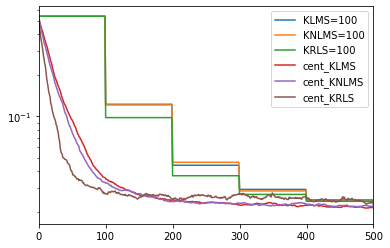

In [40]:
plt.semilogy(range(len(amse_KLMS)),amse_KLMS,label="KLMS=" + str(l))
plt.semilogy(range(len(amse_KNLMS)),amse_KNLMS,label="KNLMS=" + str(l))
plt.semilogy(range(len(amse_KRLS)),amse_KRLS,label="KRLS=" + str(l))
plt.semilogy(range(len(amse_KLMS_cent)),amse_KLMS_cent,label="cent_KLMS")
plt.semilogy(range(len(amse_KNLMS_cent)),amse_KNLMS_cent,label="cent_KNLMS")
plt.semilogy(range(len(amse_KRLS_cent)),amse_KRLS_cent,label="cent_KRLS")
plt.legend()
# plt.ylim([1e-2,1e-1])
plt.xlim([0,500])
plt.ylabel("MSE")

In [2]:
# Asynchronous Federated learning using different kernels
plt.figure(figsize=(7, 6))

K = 10 # K edge clients
c =  np.ones(K).reshape(K,1)/K # edge weighting
D = 100 # Dictionary size
P = [5]
iteration = 10000
num_experiments = 10

step_size = 0.8

KLMS_RFF = klms_rff(step_size,D)
KNLMS_RFF = knlms_rff(step_size,0.001,D)
KRLS_RFF = krls_rff(D,beta=0.8)
KLMS_RFF_cent = klms_rff(0.2,D)
KNLMS_RFF_cent = knlms_rff(0.5,1,D)
KRLS_RFF_cent = krls_rff(D,beta=2.5,l=0.85)

for p in P:
    amse_KLMS = np.zeros(iteration)
    amse_KNLMS = np.zeros(iteration)  
    amse_KRLS = np.zeros(iteration)  
    amse_KLMS_cent = np.zeros(iteration)
    amse_KNLMS_cent = np.zeros(iteration)  
    amse_KRLS_cent = np.zeros(iteration)    

    for epoch in tqdm(range(num_experiments)):

        # Process data and kernel
        u,d,d_true = load_dodd(num_data)
        sigma = 1/np.sqrt(2*kernel.sigma)
        W = (1/sigma) * np.random.normal(size=(2,D))
        b = np.random.uniform(0,2*np.pi,(D,1))
        h = np.sqrt(2/D) * np.cos(W.T @ u.T + b)
        
        FLasync = fl_async(K,h,p)
        
        mse_KLMS_cent = cent_learn(iteration,K,KLMS_RFF_cent,h,u,d)
        amse_KLMS_cent += mse_KLMS_cent/num_experiments
        mse_KNLMS_cent = cent_learn(iteration,K,KNLMS_RFF_cent,h,u,d)
        amse_KNLMS_cent += mse_KNLMS_cent/num_experiments
        mse_KRLS_cent = cent_learn(iteration,K,KRLS_RFF_cent,h,u,d)
        amse_KRLS_cent += mse_KRLS_cent/num_experiments
        
        mse_KLMS = FLasync.train(iteration,KLMS_RFF,u,d)
        amse_KLMS += mse_KLMS/num_experiments
        mse_KNLMS = FLasync.train(iteration,KNLMS_RFF,u,d)
        amse_KNLMS += mse_KNLMS/num_experiments        
        mse_KRLS = FLasync.train(iteration,KRLS_RFF,u,d)
        amse_KRLS += mse_KRLS/num_experiments  
        
plt.semilogy(range(len(amse_KLMS)),amse_KLMS,label="KLMS=" + str(p))
plt.semilogy(range(len(amse_KNLMS)),amse_KNLMS,label="KNLMS=" + str(p))
plt.semilogy(range(len(amse_KRLS)),amse_KRLS,label="KRLS=" + str(p))
plt.semilogy(range(len(amse_KLMS_cent)),amse_KLMS_cent,label="cent_KLMS")
plt.semilogy(range(len(amse_KNLMS_cent)),amse_KNLMS_cent,label="cent_KNLMS")
plt.semilogy(range(len(amse_KRLS_cent)),amse_KRLS_cent,label="cent_KRLS")
plt.legend()
plt.ylim([1e-2,1e0])
plt.xlim([0,3000])
plt.ylabel("MSE")

  0%|                                        | 0/10 [00:00<?, ?it/s]


NameError: name 'num_data' is not defined

<Figure size 504x432 with 0 Axes>